# Create feature matrix for Ob Notes Combined with ICD9, Race, and Age 

Used Ob Notes variables extracted, tidied, and then removed some columns with excess missing values. 

Did not impute missing values for remaining columns. 

Inner joined with Age, PRS, Race, and ICD9 datasets. 

In [1]:
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import display, HTML    
display(HTML("<style>.container {width:97% !important; }</style>"))
%matplotlib inline 
np.set_printoptions(precision=5, suppress=True) 
 
DATE = datetime.now().strftime('%Y-%m-%d')

In [2]:
import re

In [3]:
AGE_FILE =   "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/years_at_delivery_matrix.tsv"
DEMOG_FILE = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/demographics/demographics_matrix.tsv"
PRS_FILE = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/scripts/polygenic_risk_scores/zhang_with_covars/GRID_PRS.tsv"
OB_NOTE_VARS = os.path.join("/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables/filtered_wide_ob_notes_w_na.tsv")
ICD_DATA_ONLY = os.path.join("/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/",
                             "ptb_predict_machine_learning/feature_matrices/all_icd9_feat_mat.tsv")
BEFORE_ICD_DATA_ONLY = os.path.join("/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/",
                             "ptb_predict_machine_learning/feature_matrices/before_icd9_feat_mat.tsv")

FEAT_DIR = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/feature_matrices/ob_notes_vars"

In [4]:
age_df  = pd.read_csv(AGE_FILE, sep="\t")
race_df = pd.read_csv(DEMOG_FILE, sep="\t")
prs_df = pd.read_csv(PRS_FILE, sep="\t")
ob_df = pd.read_csv(OB_NOTE_VARS, sep="\t")
icd_df = pd.read_csv(ICD_DATA_ONLY, sep="\t")

In [5]:
before_icd_df = pd.read_csv(BEFORE_ICD_DATA_ONLY, sep="\t")

#### Missing Data for full Ob_Notes variable 

[[]]

[[]]

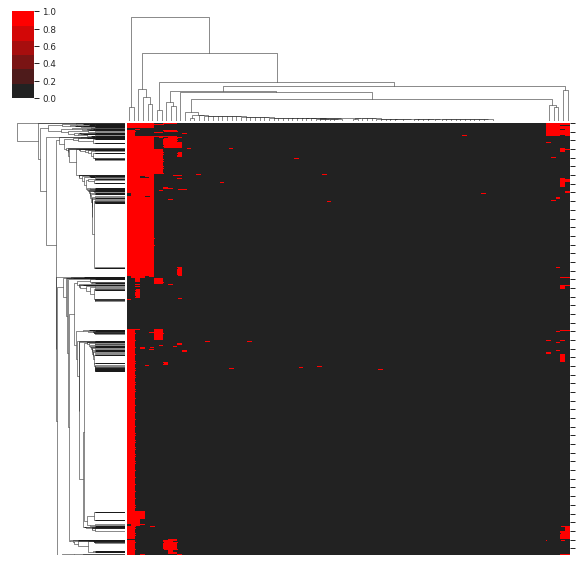

In [7]:
# visualize missing data 
# full dataset 
sns.set(style='whitegrid',rc={'figure.figsize':(16,10)})
sns.set_context("paper")
truth_array = (ob_df.isnull()).values
ax = sns.clustermap(truth_array, cmap=sns.dark_palette("red"))
hax = ax.ax_heatmap
hax.set(xticklabels=[])
hax.set(yticklabels=[])

In [8]:
col_missing = ob_df.isnull().sum().sort_values(ascending=False).reset_index()
col_missing['total'] = ob_df.shape[0]
col_missing['percent_missing'] = col_missing[0]/ob_df.shape[0]
col_missing.rename(columns={0:'num_missing'}, inplace=True)

In [9]:
col_to_remove = col_missing.iloc[0:2, 0].values
col_to_remove
col_missing
# remove Parity and Hx of C/S 

array(['Parity', 'History Previous C-section'], dtype=object)

,index,num_missing,total,percent_missing
0,Parity,2485,2838,0.875617
1,History Previous C-section,2456,2838,0.865398
2,Preterm_births,1175,2838,0.414024
3,Abortion,1031,2838,0.363284
4,Term_births,968,2838,0.341085
5,Live_Children,949,2838,0.334390
6,Pregnancy Induced Hypertension,322,2838,0.113460
7,Urinary tract infection Y_N,317,2838,0.111698
8,Menses every 28 to 30 days Y_N,301,2838,0.106061
9,Regular exercise Y_N,235,2838,0.082805


#### cleaned ob_df

In [10]:
clean_ob_df = ob_df.drop(col_to_remove, axis=1)

In [11]:
clean_ob_df.head()
clean_ob_df.shape

,GRID,Abortion,Alcohol Y_N,Baby's father had a child with birth defect not listed,Baby's father's family has history of birth defect not listed,Drugs Y_N,Endocrine Metabolic Patient Y_N,Endocrine metaboloic Patient History Y_N,"Familly History Thalessemia (Italian, Greek, Mediterranean, or Asian Background); MCV <80 Y_N",Family History Breast Disease Y_N,...,Patient History Urinary tract problems including UTIs and Pyel Y_N,Patient History of Seizure,Patient History of sexual/physical abuse or trauma Y_N,Patient's age greater than 34 at delivery Y_N,Pregnancy Induced Hypertension,Preterm_births,Regular exercise Y_N,Term_births,Tobacco Y_N,Urinary tract infection Y_N
0,R200021053,NaN,No,No,No,No,No,No,No,No,...,No,No,No,No,No,NaN,Yes,NaN,No,No
1,R200092312,1.0,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,NaN,No,5.0,No,No
2,R200142144,0.0,No,No,No,No,No,No,No,No,...,No,No,No,No,No,0.0,No,2.0,No,No
3,R200185498,NaN,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,NaN,Yes,NaN,No,No
4,R200265173,NaN,NaN,No,No,NaN,NaN,No,No,No,...,No,No,No,No,No,NaN,NaN,NaN,NaN,No


(2838, 93)

[[]]

[[]]

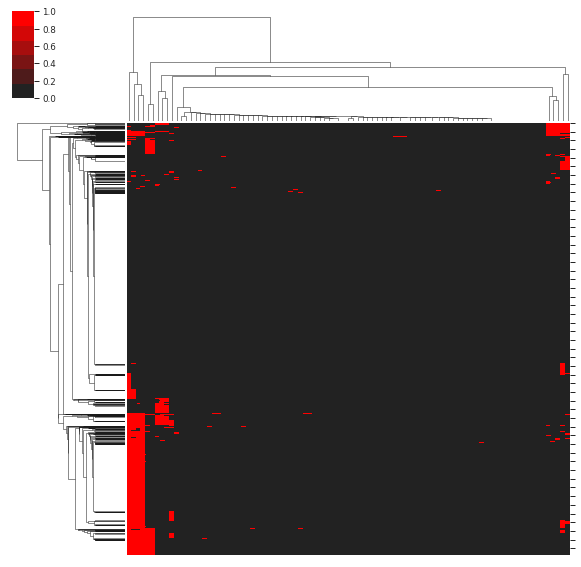

In [24]:
# visualize missing data 
# full dataset 
sns.set(style='whitegrid',rc={'figure.figsize':(16,10)})
sns.set_context("paper")
truth_array = (clean_ob_df.isnull()).values
ax = sns.clustermap(truth_array, cmap=sns.dark_palette("red"))
hax = ax.ax_heatmap
hax.set(xticklabels=[])
hax.set(yticklabels=[])

#### check shape when merging  df

In [12]:
binary_ob_df = clean_ob_df.copy()
binary_ob_df.set_index('GRID', inplace=True)

In [13]:
binary_ob_df.replace('No', 0, inplace=True)
binary_ob_df.replace('Yes', 1, inplace=True)
binary_ob_df = binary_ob_df.apply(pd.to_numeric)

In [15]:
binary_ob_df.reset_index(inplace=True)

In [18]:
binary_ob_df.head()
binary_ob_df["Term_births"].unique()

,index,GRID,Abortion,Alcohol Y_N,Baby's father had a child with birth defect not listed,Baby's father's family has history of birth defect not listed,Drugs Y_N,Endocrine Metabolic Patient Y_N,Endocrine metaboloic Patient History Y_N,"Familly History Thalessemia (Italian, Greek, Mediterranean, or Asian Background); MCV <80 Y_N",...,Patient History Urinary tract problems including UTIs and Pyel Y_N,Patient History of Seizure,Patient History of sexual/physical abuse or trauma Y_N,Patient's age greater than 34 at delivery Y_N,Pregnancy Induced Hypertension,Preterm_births,Regular exercise Y_N,Term_births,Tobacco Y_N,Urinary tract infection Y_N
0,0,R200021053,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,1.0,NaN,0.0,0.0
1,1,R200092312,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,0.0,5.0,0.0,0.0
2,2,R200142144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,0.0,0.0
3,3,R200185498,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,1.0,NaN,0.0,0.0
4,4,R200265173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0


array([nan,  5.,  2.,  3.,  0.,  1.,  4.,  6.,  7.,  8.])

In [58]:
# merge 
icd_ob_df = pd.merge(icd_df, binary_ob_df, on='GRID', how='inner')
icd_ob_age_df = pd.merge(icd_ob_df, age_df, on='GRID', how='inner')
icd_ob_age_race_df = pd.merge(icd_ob_age_df, race_df, on='GRID', how='inner')
icd_ob_age_race_prs_df = pd.merge(icd_ob_age_race_df, prs_df, on='GRID', how='inner')

In [59]:
# merge with BEFORE ICD
before_icd_ob_df = pd.merge(before_icd_df, binary_ob_df, on='GRID', how='inner')
before_icd_ob_age_df = pd.merge(before_icd_ob_df, age_df, on='GRID', how='inner')
before_icd_ob_age_race_df = pd.merge(before_icd_ob_age_df, race_df, on='GRID', how='inner')
before_icd_ob_age_race_prs_df = pd.merge(before_icd_ob_age_race_df, prs_df, on='GRID', how='inner')

In [60]:
all_grids = set(binary_ob_df.GRID.values).intersection(set(
    age_df.GRID.values)).intersection(set(race_df.GRID.values)).intersection(set(icd_df.GRID.values))

len(all_grids)

before_grids = set(binary_ob_df.GRID.values).intersection(set(
    age_df.GRID.values)).intersection(set(race_df.GRID.values)).intersection(set(before_icd_df.GRID.values))

len(before_grids)

2644

2635

In [61]:
print("shape of icd_df:\n{}\n".format(icd_df.shape))
print("shape of ob_df:\n{}\n".format(binary_ob_df.shape))
print("shape of icd_ob_df:\n{}\n".format(icd_ob_df.shape))
print("shape of icd_ob_age_df:\n{}\n".format(icd_ob_age_df.shape))
print("shape of icd_ob_age_race_df:\n{}\n".format(icd_ob_age_race_df.shape))
print("shape of icd_ob_age_race_prs_df:\n{}\n".format(icd_ob_age_race_prs_df.shape))

shape of icd_df:
(69310, 13622)

shape of ob_df:
(2838, 93)

shape of icd_ob_df:
(2838, 13714)

shape of icd_ob_age_df:
(2732, 13715)

shape of icd_ob_age_race_df:
(2644, 13721)

shape of icd_ob_age_race_prs_df:
(83, 13722)



In [62]:
print("shape of before_icd_df:\n{}\n".format(before_icd_df.shape))
print("shape of ob_df:\n{}\n".format(binary_ob_df.shape))
print("shape of before_icd_ob_df:\n{}\n".format(before_icd_ob_df.shape))
print("shape of before_icd_ob_age_df:\n{}\n".format(before_icd_ob_age_df.shape))
print("shape of before_icd_ob_age_race_df:\n{}\n".format(before_icd_ob_age_race_df.shape))
print("shape of before_icd_ob_age_race_prs_df:\n{}\n".format(before_icd_ob_age_race_prs_df.shape))

shape of before_icd_df:
(37606, 9861)

shape of ob_df:
(2838, 93)

shape of before_icd_ob_df:
(2828, 9953)

shape of before_icd_ob_age_df:
(2722, 9954)

shape of before_icd_ob_age_race_df:
(2635, 9960)

shape of before_icd_ob_age_race_prs_df:
(83, 9961)



#### Write

In [64]:
len(before_grids)

2635

In [29]:
binary_ob_df.head()
binary_file_name= os.path.join("/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/ob_notes_variables", 'filtered_wide_ob_notes_w_na_binary_and_counts.tsv')
binary_ob_df.drop(columns='index').to_csv(binary_file_name, sep="\t", index=False, na_rep="NA")


,index,GRID,Abortion,Alcohol Y_N,Baby's father had a child with birth defect not listed,Baby's father's family has history of birth defect not listed,Drugs Y_N,Endocrine Metabolic Patient Y_N,Endocrine metaboloic Patient History Y_N,"Familly History Thalessemia (Italian, Greek, Mediterranean, or Asian Background); MCV <80 Y_N",...,Patient History Urinary tract problems including UTIs and Pyel Y_N,Patient History of Seizure,Patient History of sexual/physical abuse or trauma Y_N,Patient's age greater than 34 at delivery Y_N,Pregnancy Induced Hypertension,Preterm_births,Regular exercise Y_N,Term_births,Tobacco Y_N,Urinary tract infection Y_N
0,0,R200021053,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,1.0,NaN,0.0,0.0
1,1,R200092312,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,0.0,5.0,0.0,0.0
2,2,R200142144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,2.0,0.0,0.0
3,3,R200185498,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,1.0,NaN,0.0,0.0
4,4,R200265173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0


In [65]:
### WRITE THE SAME NUMBER OF GRIDS 
icd_ob_df[icd_ob_df.GRID.isin(all_grids)].to_csv(os.path.join(FEAT_DIR, 'icd9_ob_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
icd_ob_age_df[icd_ob_age_df.GRID.isin(all_grids)].to_csv(os.path.join(FEAT_DIR, 'icd9_ob_age_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
icd_ob_age_race_df[icd_ob_age_race_df.GRID.isin(all_grids)].to_csv(os.path.join(FEAT_DIR, 'icd9_ob_age_race_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                  index=False, na_rep="NA")
icd_df[icd_df.GRID.isin(all_grids)].to_csv(os.path.join(FEAT_DIR, 'icd9_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                  index=False, na_rep="NA")

before_icd_ob_df[before_icd_ob_df.GRID.isin(before_grids)].to_csv(os.path.join(FEAT_DIR, 
                'before_icd9_ob_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
before_icd_ob_age_df[before_icd_ob_age_df.GRID.isin(before_grids)].to_csv(os.path.join(FEAT_DIR, 
                'before_icd9_ob_age_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
before_icd_ob_age_race_df[before_icd_ob_age_race_df.GRID.isin(before_grids)].to_csv(os.path.join(FEAT_DIR, 
                'before_icd9_ob_age_race_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
before_icd_df[before_icd_df.GRID.isin(before_grids)].to_csv(os.path.join(FEAT_DIR, 
                'before_icd9_w_na_eq_samples_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")



In [66]:
## NUMBER OF GRIDS IS NOT LIMITED TO intersection off all three datasets 

icd_ob_df.to_csv(os.path.join(FEAT_DIR, 'icd9_ob_w_na_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
icd_ob_age_df.to_csv(os.path.join(FEAT_DIR, 'icd9_ob_age_w_na_feat_mat.tsv'), sep="\t", 
                 index=False, na_rep="NA")
icd_ob_age_race_df.to_csv(os.path.join(FEAT_DIR, 'icd9_ob_age_race_w_na_feat_mat.tsv'), sep="\t", 
                  index=False, na_rep="NA")
icd_df.to_csv(os.path.join(FEAT_DIR, 'icd9_w_na_feat_mat.tsv'), sep="\t", 
                  index=False, na_rep="NA")



KeyboardInterrupt: 

### Other

In [20]:
DATA_ROOT = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/"
ICD10_FILE = os.path.join(DATA_ROOT, "full_dataset/full_ICD10_cohort.tsv")

In [21]:
# load icd10 and see overlap 
after_icd10_file = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/billing_codes_long_table/icd10_after_first_delivery.tsv"
before_icd10_file = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/ptb_predict_machine_learning/billing_codes_long_table/icd10_before_first_delivery.tsv"

In [22]:
icd10_df = pd.read_csv(ICD10_FILE, sep="\t")

In [23]:
icd10_grids = icd10_df.GRID.values

In [24]:
ob_df.shape
len(icd10_grids)
ob_df[ob_df.GRID.isin(icd10_grids)].shape

(2838, 95)

1043520

(1378, 95)

1376 from icd10 and 199 from icd9 is only 1575. <br> 
1,263 GRIDS are still missing...

check if these grids are present in estimated delivery date...

In [25]:
# load delivery dates lable 
delivery_date_file = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset_characterization/est_delivery_date_at_least_one_icd_cpt_ega.tsv"
delivery_df = pd.read_csv(delivery_date_file, sep="\t")

In [26]:
delivery_df.head()
delivery_df.shape

,GRID,consensus_delivery,num_codes,max_diff_days,icd_exists,cpt_exists,ega_exists,icd_label,ega_label,consensus_label,delivery_id
0,R200000594,2006-04-05,2,2,True,True,False,preterm,None,preterm,2006-04-05_R200000594
1,R200006865,2015-12-19,2,2,True,True,False,"preterm, term",None,term,2015-12-19_R200006865
2,R200009152,2007-04-26,2,0,True,True,False,"postterm, term",None,postterm,2007-04-26_R200009152
3,R200009182,2014-07-13,2,0,False,True,True,None,term,term,2014-07-13_R200009182
4,R200009647,2014-01-15,3,3,True,True,True,preterm,preterm,preterm,2014-01-15_R200009647


(54286, 11)

In [27]:
ob_df.shape
ob_df[ob_df.GRID.isin(delivery_df.GRID)].shape

(2838, 95)

(2838, 95)

Yes, they are all there...  <br> 
So I have icd or cpt or ega data for them ... check cpt raw file  


In [28]:
cpt_file = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_cpt_codes/delivery_CPT_only-cohort.tsv"

In [29]:
cpt_df = pd.read_csv(cpt_file, sep="\t")

In [30]:
cpt_df.head()

,GRID,CPT,Date,concat_row
0,R222925390,59400,2003-07-26,R222925390_59400_2003-07-26
1,R299008218,59510,2003-09-26,R299008218_59510_2003-09-26
2,R212583382,59409,2002-12-04,R212583382_59409_2002-12-04
3,R212583382,59610,2002-12-04,R212583382_59610_2002-12-04
4,R284418194,59514,2001-07-27,R284418194_59514_2001-07-27


In [31]:
ob_df.shape
ob_df[ob_df.GRID.isin(cpt_df.GRID)].shape

(2838, 95)

(2820, 95)

AHA! CPT dataet contains almost all of them ...

now, i want to know if icd9/icd10 raw data has these grids... 

In [200]:
raw_icd9 = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset/full_ICD9_cohort.tsv"
raw_icd10 = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset/full_ICD10_cohort.tsv"

In [201]:
ricd9 = pd.read_csv(raw_icd9, sep='\t')
ricd10 = pd.read_csv(raw_icd10, sep='\t')

In [204]:
ob_df[ob_df.GRID.isin(ricd9.GRID)].shape
ob_df[ob_df.GRID.isin(ricd10.GRID)].shape

(2838, 95)

(1378, 95)

I want to intersect with EGA data pulled from the ob record ...

In [205]:
ob_ega = "/dors/capra_lab/users/abraha1/projects/PTB_phenotyping/data/combined_cohorts_07_12_2018/full_dataset_characterization/ega_based_est_delivery.tsv"

In [207]:
ob_ega_df = pd.read_csv(ob_ega, sep="\t")

In [210]:
ob_df.shape
ob_df[ob_df.GRID.isin(ob_ega_df.GRID)].shape

(2838, 95)

(2505, 95)